In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
import random

In [2]:
def load_images(folder_path, img_size=(128, 128)):
    X, y = [], []
    for label in ['yes', 'no']:
        path = os.path.join(folder_path, label)
        for file in os.listdir(path):
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

X_images, y_labels = load_images('./brain_tumor_dataset')
print(f"✅ Loaded {len(X_images)} images. Each image shape: {X_images[0].shape}")

✅ Loaded 253 images. Each image shape: (128, 128)


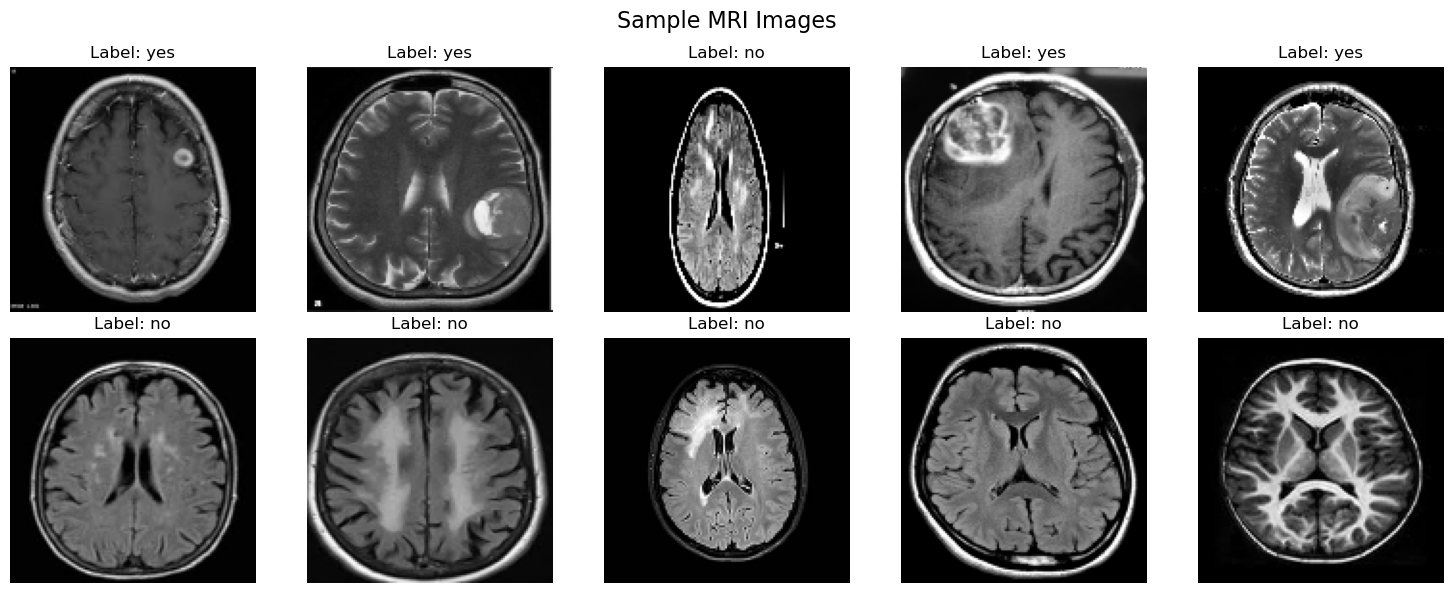

In [3]:
def show_random_images(images, labels, rows=2, cols=5):
    plt.figure(figsize=(15, 6))
    for i in range(1, rows * cols + 1):
        idx = random.randint(0, len(images) - 1)
        plt.subplot(rows, cols, i)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.suptitle("Sample MRI Images", fontsize=16)
    plt.tight_layout()
    plt.show()

show_random_images(X_images, y_labels)

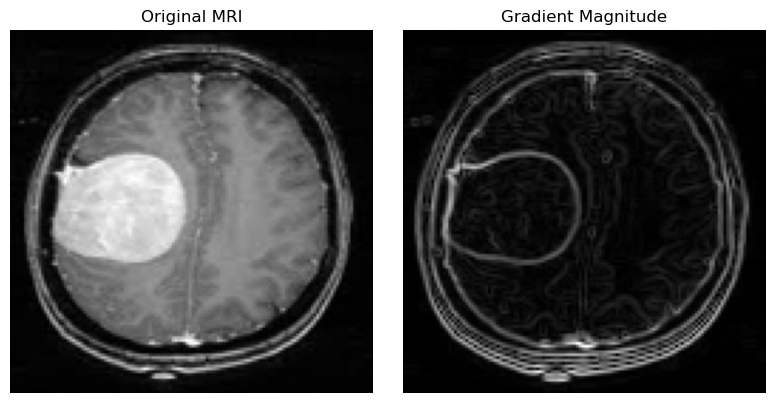

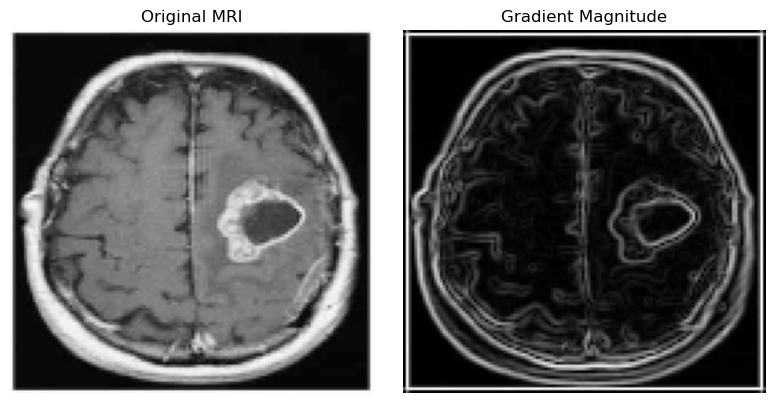

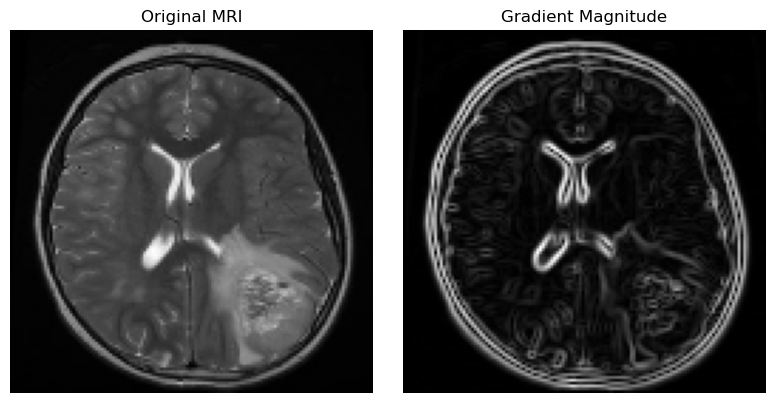

✅ Gradient magnitude features computed. Feature shape: (253, 16384)


In [4]:
def visualize_magnitude_sample(img, magnitude):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original MRI")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Gradient Magnitude")
    plt.imshow(magnitude, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def compute_magnitude_features(images, sample_visuals=3):
    mag_feats = []
    for i, img in enumerate(images):
        gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        magnitude = cv2.magnitude(gx, gy)

        mag_feats.append(magnitude.flatten())

        # Show visuals for first few images
        if i < sample_visuals:
            visualize_magnitude_sample(img, magnitude)

    return np.array(mag_feats)

# Compute only gradient magnitude features
X_features = compute_magnitude_features(X_images)
print(f"✅ Gradient magnitude features computed. Feature shape: {X_features.shape}")

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42)

print("✅ Dataset split:")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

✅ Dataset split:
Training set size: 202
Testing set size: 51


In [6]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("✅ PCA applied. Reduced feature shape:", X_train_pca.shape)

✅ PCA applied. Reduced feature shape: (202, 100)



✅ SVM (Linear) Metrics:
Accuracy:  86.27%
Precision: 0.79
Recall:    1.00
F1-Score:  0.89
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.79      1.00      0.89        27

    accuracy                           0.86        51
   macro avg       0.90      0.85      0.86        51
weighted avg       0.89      0.86      0.86        51



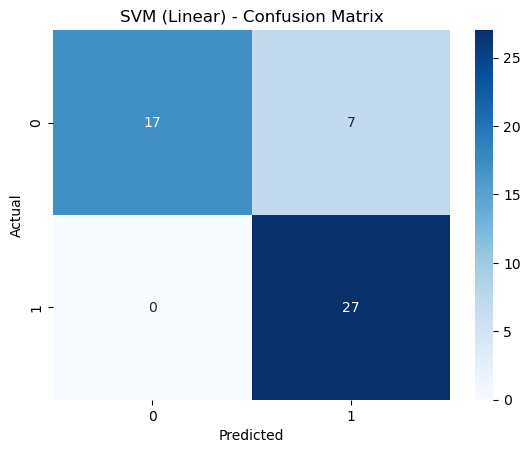


✅ SVM (RBF) Metrics:
Accuracy:  76.47%
Precision: 0.73
Recall:    0.89
F1-Score:  0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.73      0.89      0.80        27

    accuracy                           0.76        51
   macro avg       0.78      0.76      0.76        51
weighted avg       0.78      0.76      0.76        51



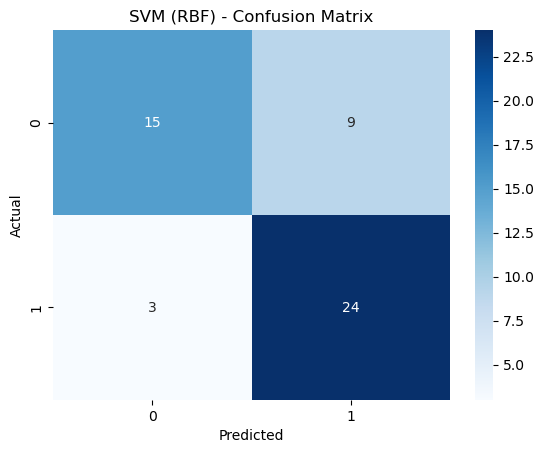


✅ Random Forest Metrics:
Accuracy:  82.35%
Precision: 0.75
Recall:    1.00
F1-Score:  0.86
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.75      1.00      0.86        27

    accuracy                           0.82        51
   macro avg       0.88      0.81      0.81        51
weighted avg       0.87      0.82      0.82        51



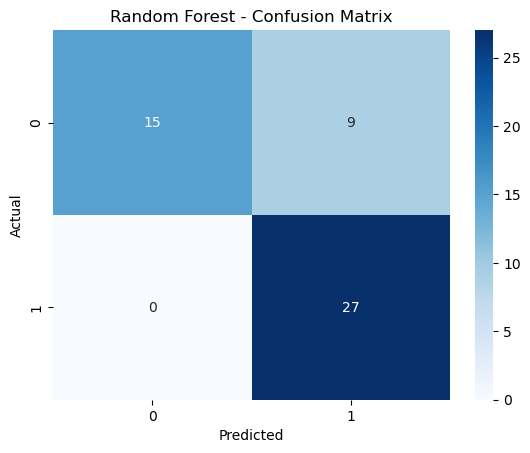


✅ KNN (k=5) Metrics:
Accuracy:  76.47%
Precision: 0.76
Recall:    0.81
F1-Score:  0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.76      0.81      0.79        27

    accuracy                           0.76        51
   macro avg       0.77      0.76      0.76        51
weighted avg       0.77      0.76      0.76        51



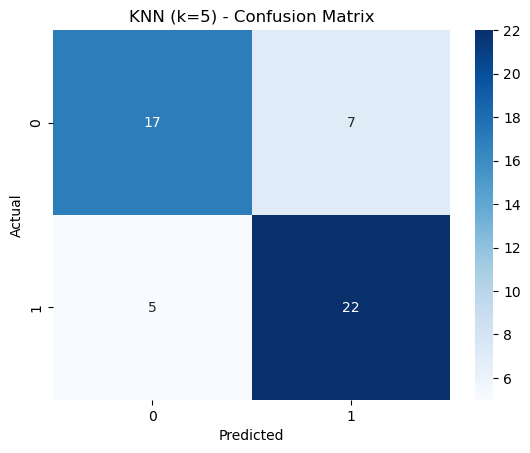


✅ Logistic Regression Metrics:
Accuracy:  92.16%
Precision: 0.90
Recall:    0.96
F1-Score:  0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.90      0.96      0.93        27

    accuracy                           0.92        51
   macro avg       0.93      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51



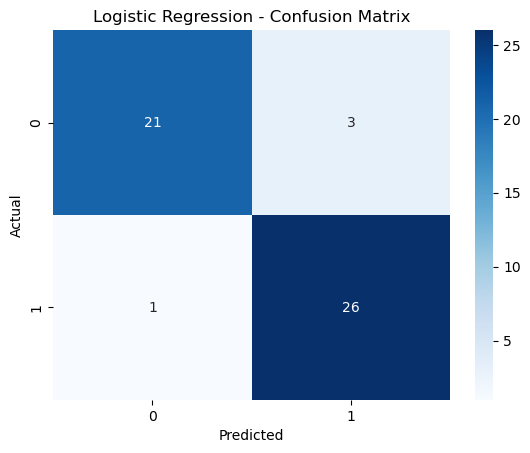


📋 Overall Performance Table:


,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVM (Linear),0.862745,0.794118,1.000000,0.885246
SVM (RBF),0.764706,0.727273,0.888889,0.800000
Random Forest,0.823529,0.750000,1.000000,0.857143
KNN (k=5),0.764706,0.758621,0.814815,0.785714
Logistic Regression,0.921569,0.896552,0.962963,0.928571


C:\Users\lahar\AppData\Local\Temp\ipykernel_25268\287381608.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lahar\anaconda3\envs\dip\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


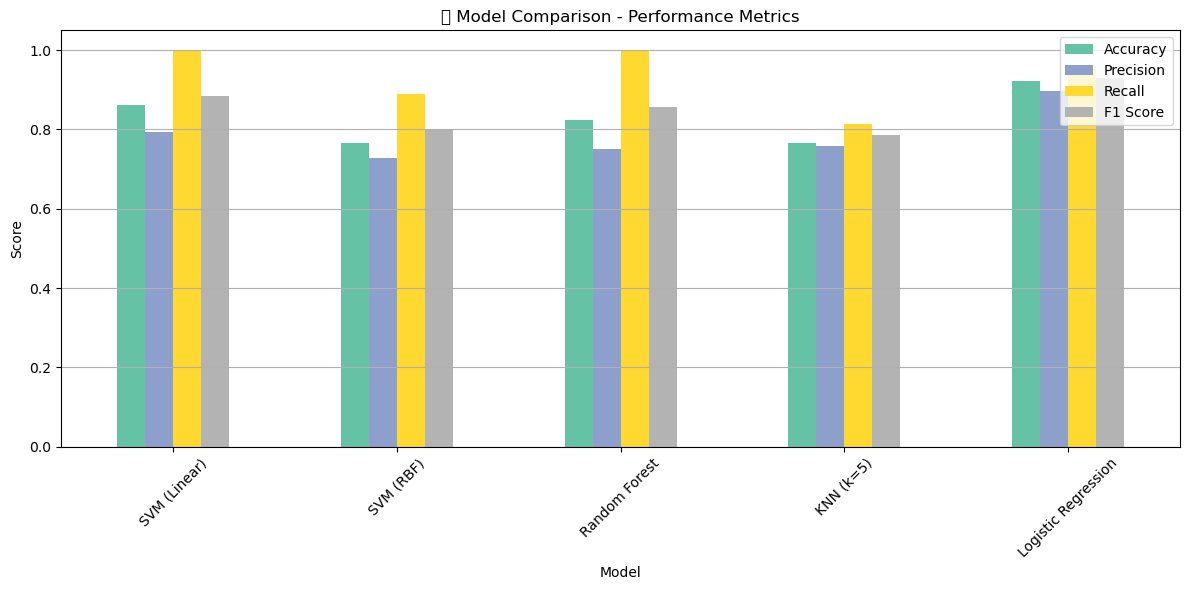


🏆 Best Model: Logistic Regression with Accuracy: 92.16%


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

model_scores = []

def evaluate_model(model, name):
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n✅ {name} Metrics:")
    print(f"Accuracy:  {acc * 100:.2f}%")
    print(f"Precision: {prec:.2f}")
    print(f"Recall:    {rec:.2f}")
    print(f"F1-Score:  {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    model_scores.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    return model

models = {
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

trained_models = {}
for name, model in models.items():
    trained_models[name] = evaluate_model(model, name)

# Performance Table
scores_df = pd.DataFrame(model_scores).set_index("Model")
print("\n📋 Overall Performance Table:")
display(scores_df)

# Plot
scores_df.plot(kind='bar', figsize=(12, 6), colormap="Set2")
plt.title("🔍 Model Comparison - Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 🏆 Get Best Model by Accuracy
best_model_name = scores_df['Accuracy'].idxmax()
best_model_score = scores_df.loc[best_model_name, 'Accuracy']
best_model = trained_models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_model_score * 100:.2f}%")


🧠 Prediction by Best Model (Logistic Regression): Tumor Detected ✅


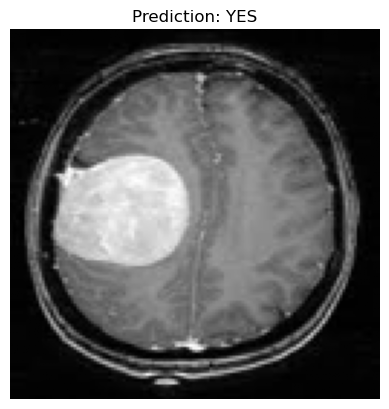


🧠 Prediction by Best Model (Logistic Regression): No Tumor Detected ❎


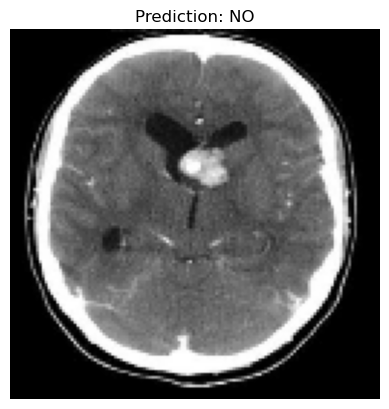

In [9]:
def get_best_model(model_scores):
    best_model_name = model_scores['Accuracy'].idxmax()
    return trained_models[best_model_name], best_model_name

def predict_new_image(image_path, trained_models, pca_model, label_encoder, model_scores):
    best_model, best_model_name = get_best_model(model_scores)

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    mag = cv2.magnitude(gx, gy)

    feature_vector = mag.flatten().reshape(1, -1)
    feature_pca = pca_model.transform(feature_vector)

    prediction = best_model.predict(feature_pca)
    predicted_label = label_encoder.inverse_transform(prediction)[0]

    print(f"\n🧠 Prediction by Best Model ({best_model_name}): {'Tumor Detected ✅' if predicted_label == 'yes' else 'No Tumor Detected ❎'}")

    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {predicted_label.upper()}")
    plt.axis('off')
    plt.show()

# Example Predictions
predict_new_image('./brain_tumor_dataset/yes/Y1.jpg', trained_models, pca, label_encoder, scores_df)
predict_new_image('./brain_tumor_dataset/no/N1.jpg', trained_models, pca, label_encoder, scores_df)

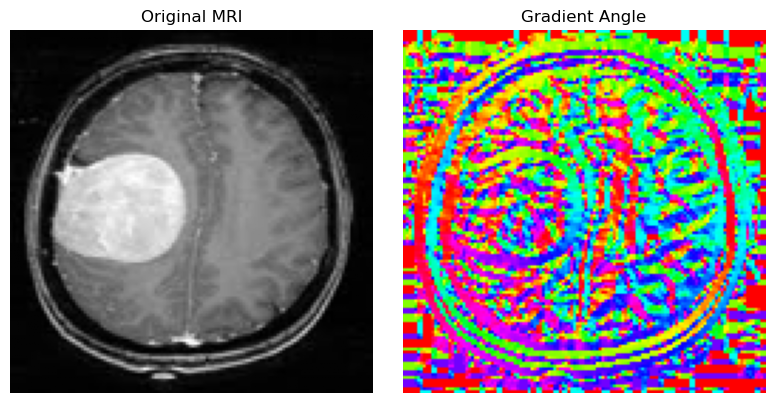

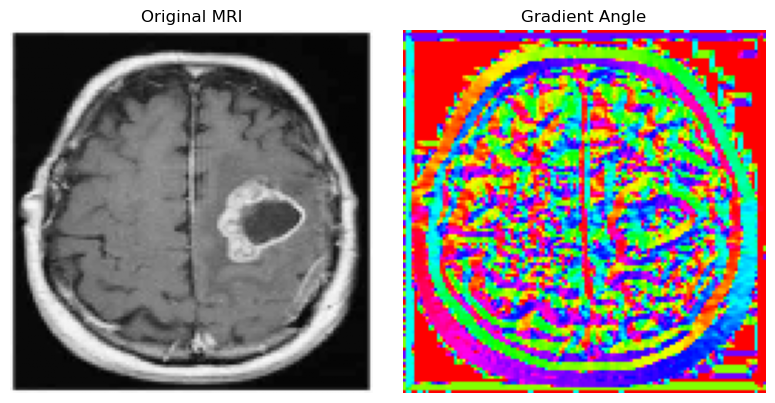

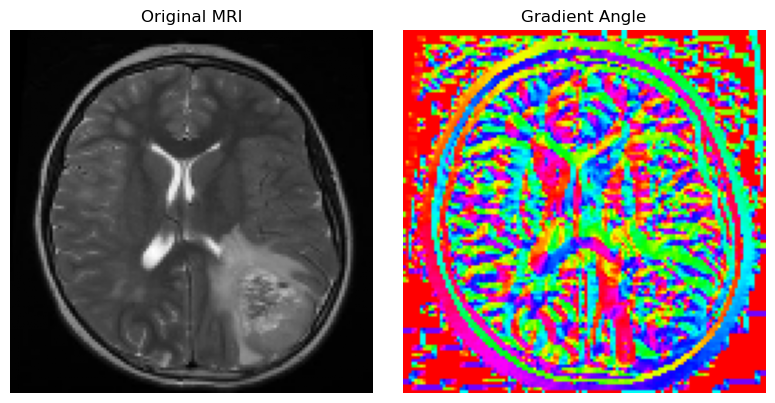

✅ Gradient angle features computed. Feature shape: (253, 16384)


In [10]:
def visualize_angle_sample(img, angle):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original MRI")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Gradient Angle")
    plt.imshow(angle, cmap='hsv')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def compute_angle_features(images, sample_visuals=3):
    ang_feats = []
    for i, img in enumerate(images):
        gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        angle = cv2.phase(gx, gy, angleInDegrees=True)

        ang_feats.append(angle.flatten())

        # Show visuals for first few images
        if i < sample_visuals:
            visualize_angle_sample(img, angle)

    return np.array(ang_feats)

# Compute only gradient angle features
X_features = compute_angle_features(X_images)
print(f"✅ Gradient angle features computed. Feature shape: {X_features.shape}")

In [11]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("✅ Dataset split:")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

✅ Dataset split:
Training set size: 202
Testing set size: 51


In [12]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("✅ PCA applied. Reduced feature shape:", X_train_pca.shape)

✅ PCA applied. Reduced feature shape: (202, 100)



✅ SVM (Linear) Metrics (Gradient Angle):
Accuracy:  84.31%
Precision: 0.83
Recall:    0.94
F1-Score:  0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.83      0.94      0.88        31

    accuracy                           0.84        51
   macro avg       0.85      0.82      0.83        51
weighted avg       0.85      0.84      0.84        51



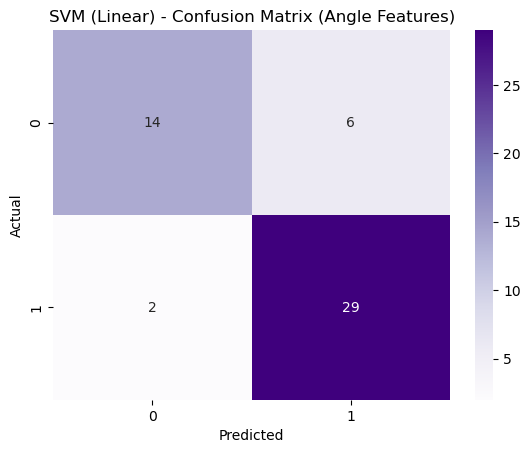


✅ SVM (RBF) Metrics (Gradient Angle):
Accuracy:  80.39%
Precision: 0.78
Recall:    0.94
F1-Score:  0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.78      0.94      0.85        31

    accuracy                           0.80        51
   macro avg       0.82      0.77      0.78        51
weighted avg       0.81      0.80      0.80        51



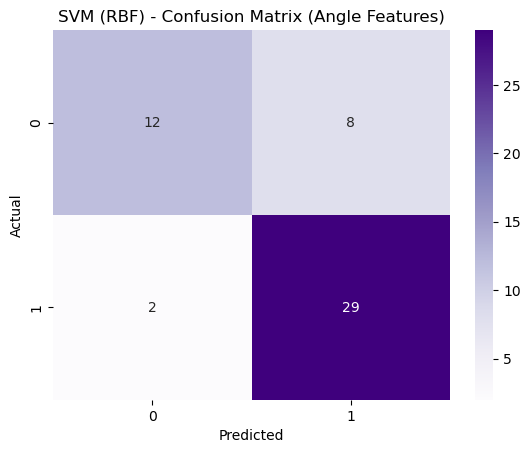


✅ Random Forest Metrics (Gradient Angle):
Accuracy:  78.43%
Precision: 0.74
Recall:    1.00
F1-Score:  0.85
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        20
           1       0.74      1.00      0.85        31

    accuracy                           0.78        51
   macro avg       0.87      0.72      0.74        51
weighted avg       0.84      0.78      0.76        51



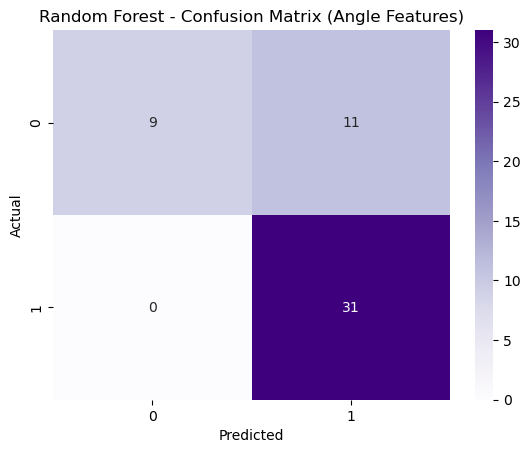


✅ KNN (k=5) Metrics (Gradient Angle):
Accuracy:  76.47%
Precision: 0.76
Recall:    0.90
F1-Score:  0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65        20
           1       0.76      0.90      0.82        31

    accuracy                           0.76        51
   macro avg       0.77      0.73      0.74        51
weighted avg       0.77      0.76      0.75        51



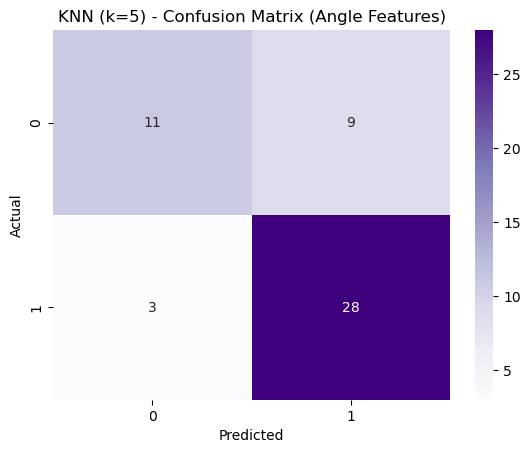


✅ Logistic Regression Metrics (Gradient Angle):
Accuracy:  84.31%
Precision: 0.90
Recall:    0.84
F1-Score:  0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.90      0.84      0.87        31

    accuracy                           0.84        51
   macro avg       0.83      0.84      0.84        51
weighted avg       0.85      0.84      0.84        51



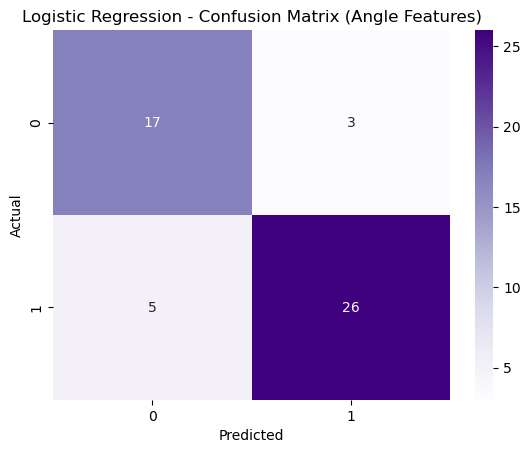


📋 Overall Performance Table (Gradient Angle Features):


,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVM (Linear),0.843137,0.828571,0.935484,0.878788
SVM (RBF),0.803922,0.783784,0.935484,0.852941
Random Forest,0.784314,0.738095,1.000000,0.849315
KNN (k=5),0.764706,0.756757,0.903226,0.823529
Logistic Regression,0.843137,0.896552,0.838710,0.866667


C:\Users\lahar\AppData\Local\Temp\ipykernel_25268\2426375606.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lahar\anaconda3\envs\dip\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


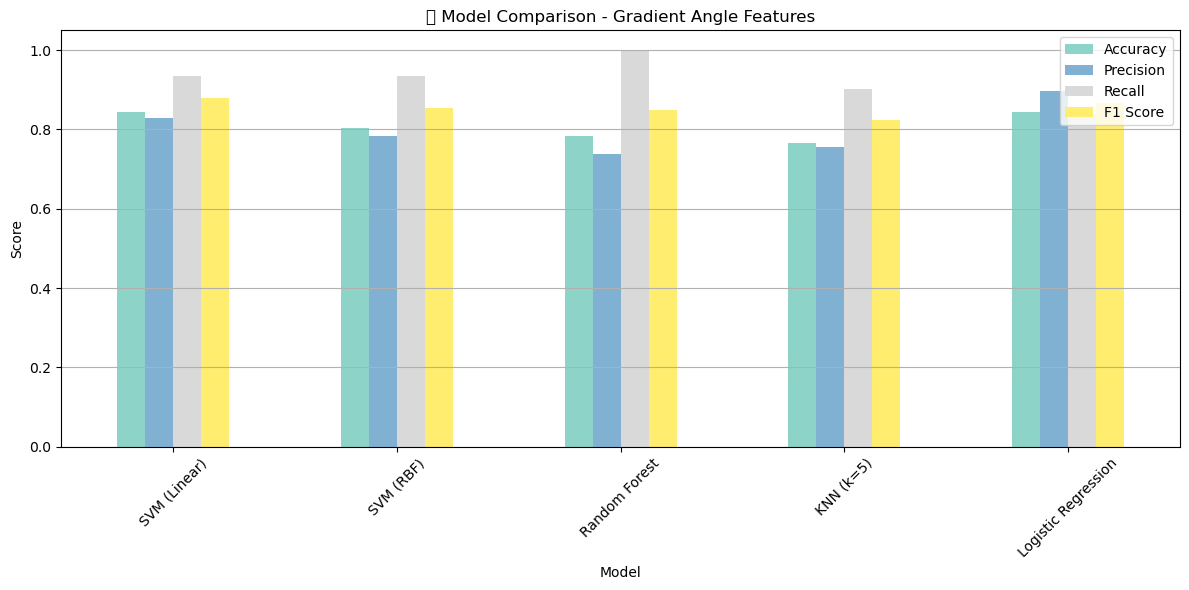


🏆 Best Model (Angle): SVM (Linear) with Accuracy: 84.31%


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

model_scores_angle = []

def evaluate_model_angle(model, name):
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n✅ {name} Metrics (Gradient Angle):")
    print(f"Accuracy:  {acc * 100:.2f}%")
    print(f"Precision: {prec:.2f}")
    print(f"Recall:    {rec:.2f}")
    print(f"F1-Score:  {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title(f"{name} - Confusion Matrix (Angle Features)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    model_scores_angle.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    return model

models = {
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

trained_models_angle = {}
for name, model in models.items():
    trained_models_angle[name] = evaluate_model_angle(model, name)

# 📋 Performance Table
scores_df_angle = pd.DataFrame(model_scores_angle).set_index("Model")
print("\n📋 Overall Performance Table (Gradient Angle Features):")
display(scores_df_angle)

# 📊 Plot
scores_df_angle.plot(kind='bar', figsize=(12, 6), colormap="Set3")
plt.title("🔍 Model Comparison - Gradient Angle Features")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 🏆 Get Best Model by Accuracy
best_model_name_angle = scores_df_angle['Accuracy'].idxmax()
best_model_score_angle = scores_df_angle.loc[best_model_name_angle, 'Accuracy']
best_model_angle = trained_models_angle[best_model_name_angle]

print(f"\n🏆 Best Model (Angle): {best_model_name_angle} with Accuracy: {best_model_score_angle * 100:.2f}%")


🧠 Prediction by Best Model (SVM (Linear)): Tumor Detected ✅


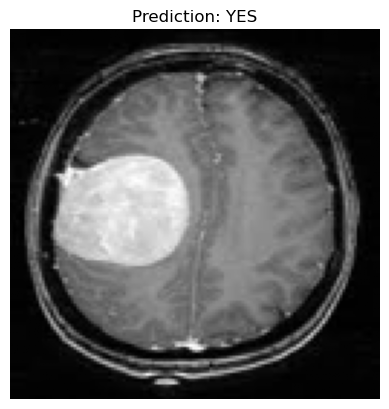


🧠 Prediction by Best Model (SVM (Linear)): No Tumor Detected ❎


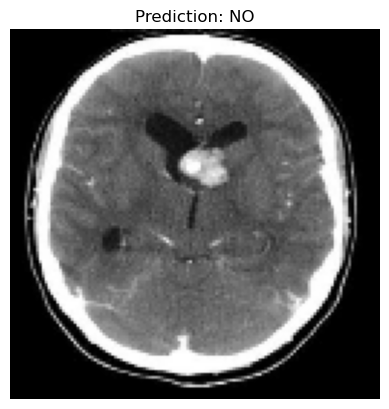

In [20]:
def predict_with_best_model(image_path, trained_models_angle, pca_model, label_encoder, model_scores_angle):
    # Get the best model based on accuracy
    best_model_name = model_scores_angle['Accuracy'].idxmax()
    best_model = trained_models_angle[best_model_name]

    # Load the image and preprocess it
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    # Compute gradients
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient angle
    angle = cv2.phase(gx, gy, angleInDegrees=True)  # Gradient angle in degrees

    # Flatten and transform the angle feature with PCA
    feature_vector = angle.flatten().reshape(1, -1)
    feature_pca = pca_model.transform(feature_vector)

    # Make prediction using the best model
    prediction = best_model.predict(feature_pca)
    predicted_label = label_encoder.inverse_transform(prediction)[0]

    # Output the prediction result
    print(f"\n🧠 Prediction by Best Model ({best_model_name}): {'Tumor Detected ✅' if predicted_label == 'yes' else 'No Tumor Detected ❎'}")

    # Show the original image and gradient angle visualization
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {predicted_label.upper()}")
    plt.axis('off')
    plt.show()

# Example Predictions using the Best Model (Gradient Angle)
predict_with_best_model('./brain_tumor_dataset/yes/Y1.jpg', trained_models_angle, pca, label_encoder, scores_df_angle)
predict_with_best_model('./brain_tumor_dataset/no/N1.jpg', trained_models_angle, pca, label_encoder, scores_df_angle)